In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('./Datasets/Advertising.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
scalerx = StandardScaler()
scalery = StandardScaler()

scalerx.fit(data[['TV', 'radio', 'newspaper']])
scalery.fit(data['sales'].values.reshape(-1,1))
newX = scalerx.transform(data[['TV', 'radio', 'newspaper']])
newY = scalery.transform(data['sales'].values.reshape(-1,1))
newX

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [16]:
lin = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(newX, newY, test_size=0.3, random_state=3)
lin.fit(xtrain, ytrain)
print("Slopes = ",lin.coef_,"Intercept: ", lin.intercept_[0])
print("Slope of TV: ",lin.coef_[0][0],"\nSlope of Radio: ",lin.coef_[0][1],"\nSlope of Newspaper: ",lin.coef_[0][2])
preds=lin.predict(xtest)

Slopes =  [[ 0.7066215  0.5347306 -0.0225956]] Intercept:  0.004214118263491717
Slope of TV:  0.7066214950644448 
Slope of Radio:  0.5347305977793047 
Slope of Newspaper:  -0.022595597408304066


In [14]:
print("The Equation is: \nY =",lin.coef_[0][0],'* X1',lin.coef_[0][1],'* X2',lin.coef_[0][2],'* X3 +',lin.intercept_[0])

The Equation is: 
Y = 0.7066214950644448 * X1 0.5347305977793047 * X2 -0.022595597408304066 * X3 + 0.004214118263491717


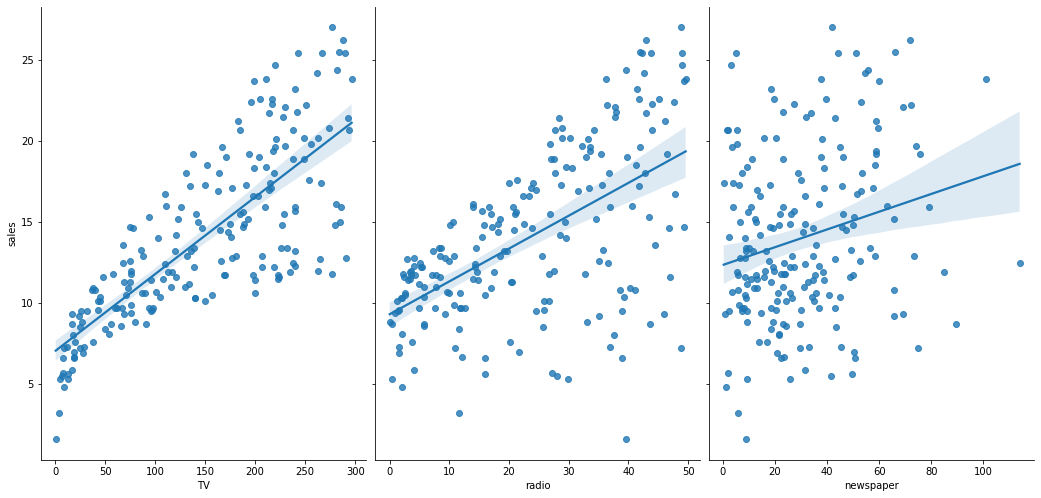

In [23]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [30]:
## Optional , If they ask to predict a new random value

x = [[230, 37, 69]]
pred_single = lin.predict(scalerx.transform(x))
print("Scaled output ", pred_single)
print("Unscaled output ", scalery.inverse_transform(pred_single))

Scaled output  [[1.14468372]]
Unscaled output  [[19.97988803]]


/home/presz/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
mse= mean_squared_error(ytest, preds)
mae = mean_absolute_error(ytest, preds)
rmse = pow(mse, 0.5)
print("Mean Squared Error: ", mse)
print("Mean absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  0.1503230876911413
Mean absolute Error:  0.26625911383705975
Root Mean Squared Error:  0.3877152146758511
